In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices

%matplotlib inline

In [10]:
df = pd.read_csv('Credit.csv')
df['IncomeGreaterThan50'] = np.where(df['Income'] > 50.0, 'Yes', 'No')
df = df.astype({'IncomeGreaterThan50': 'category'})
df = pd.get_dummies(df, columns=['IncomeGreaterThan50'])

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


In [11]:
from sklearn import neighbors
from sklearn import metrics
n_neighbors=100


equation = 'IncomeGreaterThan50_Yes ~ Rating + Balance'

y, X = dmatrices(equation, data=train, return_type='dataframe') 

# predictor = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y.values.ravel())

# y_true, X = dmatrices(equation, data=test, return_type='dataframe') 
# y_pred = predictor.predict(X)

# metrics.accuracy_score(y_true, y_pred)

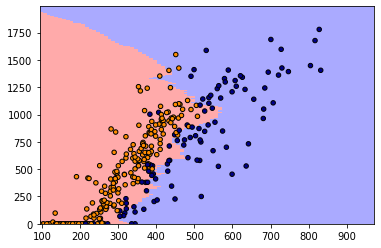

In [66]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

equation = 'IncomeGreaterThan50_Yes ~ Rating + Balance'

y_train, X_train = dmatrices(equation, data=train, return_type='dataframe') 

y_test, X_test = dmatrices(equation, data=test, return_type='dataframe') 

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train.values.ravel())

h = 10  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

x_min, x_max = X_train['Rating'].min(), X_train['Rating'].max()
y_min, y_max = X_train['Balance'].min(), X_train['Balance'].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_meshgrid = np.c_[np.array([1.0] * X_meshgrid.shape[0]), xx.ravel(), yy.ravel()]

Z = clf.predict(X_meshgrid)
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_train['Rating'], X_train['Balance'], c=y_train['IncomeGreaterThan50_Yes'], cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


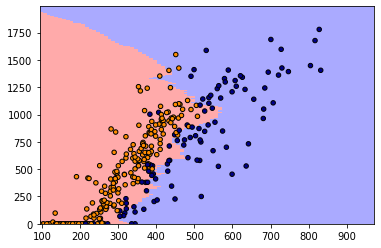

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

equation = 'IncomeGreaterThan50_Yes ~ Rating + Balance'

y_train, X_train = dmatrices(equation, data=train, return_type='dataframe') 

y_test, X_test = dmatrices(equation, data=test, return_type='dataframe') 

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train.values.ravel())

h = 10  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
x_min, x_max = X_train[X_train.columns[1]].min(), X_train[X_train.columns[1]].max()
y_min, y_max = X_train[X_train.columns[2]].min(), X_train[X_train.columns[2]].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_meshgrid = np.c_[np.array([1.0] * X_meshgrid.shape[0]), xx.ravel(), yy.ravel()]

Z = clf.predict(X_meshgrid)
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_train[X_train.columns[1]], X_train[X_train.columns[2]], c=y_train['IncomeGreaterThan50_Yes'], cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()



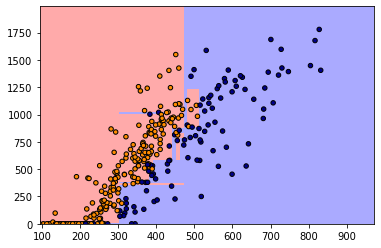

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, tree

equation = 'IncomeGreaterThan50_Yes ~ Rating + Balance'

y_train, X_train = dmatrices(equation, data=train, return_type='dataframe') 

y_test, X_test = dmatrices(equation, data=test, return_type='dataframe') 

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())

h = 10  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
x_min, x_max = X_train[X_train.columns[1]].min(), X_train[X_train.columns[1]].max()
y_min, y_max = X_train[X_train.columns[2]].min(), X_train[X_train.columns[2]].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_meshgrid = np.c_[np.array([1.0] * X_meshgrid.shape[0]), xx.ravel(), yy.ravel()]

Z = clf.predict(X_meshgrid)
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_train[X_train.columns[1]], X_train[X_train.columns[2]], c=y_train['IncomeGreaterThan50_Yes'], cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

